# Life cycle of a Density Matrix

This notebook's purpose is to give examples for the usage of the DensityMatrix class of Perceval. It was made by a software intern and
may contain some errors concerning quantum physics. Feel free to give your feedback and suggest some modifications.

## Basics

In [4]:
import perceval as pcvl
from perceval import Source, DensityMatrix, BasicState, Simulator, SLOSBackend
from perceval.components import BS, PS, Unitary
import numpy as np
from numpy import pi

If we try to reproduce the Hong-Ou-Mandel effect in Perceval, we can clearly see the quantum coherence in the non-diagonal coefficients of
the output density matrix.

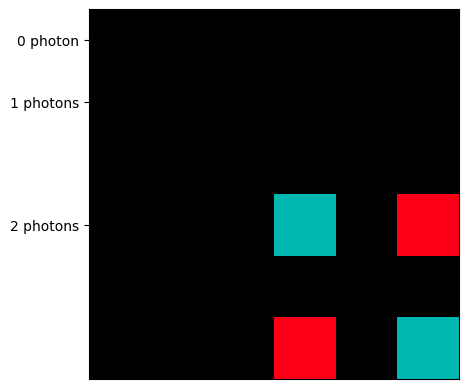

In [5]:
circuit = BS.H()
sim = Simulator(SLOSBackend())
sim.set_circuit(circuit)

output_state = sim.evolve(BasicState([1, 1]))
output_density_matrix = DensityMatrix.from_svd(output_state)

pcvl.pdisplay(output_density_matrix)

Now, if we use a source with a low brightness, some of this coherence will fade into non-coherent 1 photon states.

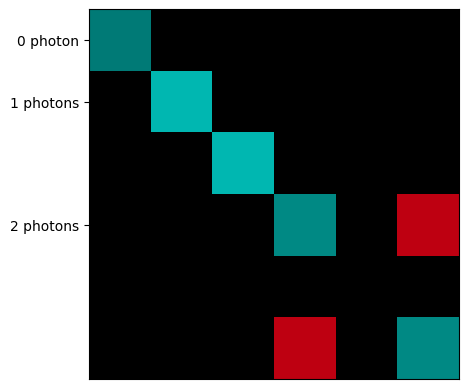

In [9]:
source = Source(.6)
input_density_matrix = DensityMatrix.from_svd(source.generate_distribution(BasicState([1, 1])))

output_density_matrix = sim.evolve_density_matrix(input_density_matrix)
pcvl.pdisplay(output_density_matrix)

## Expectation value of an operator

The expectation value of an operator $\textbf{\hat{O}}$ over a quantum system represented by a density matrix $
\textbf{\rho}$ is given by the nice formula :
$$
 <\textbf{\hat{O}}>  =  Tr(\textbf{\hat{O}}\textbf{\rho})
$$
Below we will evaluate the expectation value of the number operator $\textbf{\hat{N}}$ and the Hamiltonian $\textbf{\hat{H}}$ for the 
density matrix found above.

In [10]:
dm_shape = output_density_matrix.shape
number_operator = np.zeros(dm_shape)

for state, index in output_density_matrix.index.items():
    number_operator[index, index] = state.n 

print((number_operator @ output_density_matrix.mat).trace())


(1.2+0j)


We expectedly get 1.2 as we have a 60% chance to each of our two photons (from the source parameter)

Now we can try to compute the "hamiltonian" from the common relation : 
$$
\textbf{\hat{H}} = (\textbf{\hat{N}} + \frac{1}{2})\hbar\omega
$$
We will take $\omega = 2\pi\frac{c}{\lambda}$ with the value $\lambda = 928nm$ as in Ascella

In [ ]:
hbar = 1.05457182e-34
omega = (2*pi*2.99e8)*928e-9

hamiltonian = hbar * omega * (number_operator + (1/2)*np.eye(dm_shape))

print((hamiltonian @ output_density_matrix).trace())